In [50]:
from __future__ import division
from scipy.constants import physical_constants
# import BGW_utils as BGW_utils
import sys

import numpy as np

import subprocess
import h5py

import matplotlib.pyplot as plt
#%matplotlib inline
config_dir = '/Users/rdelgrande/work/presentation.mplstyle'
plt.style.use(config_dir)


sys.path.insert(0, '/Users/rdelgrande/work/Codes/utilities/BGW')


# Constants
# ref: https://docs.scipy.org/doc/scipy/reference/constants.html#
Ry2eV = physical_constants["Rydberg constant times hc in eV"][0]
bohr2A = physical_constants["Bohr radius"][0]*1e10
Ha2eV = Ry2eV*2


#%matplotlib widget    # interactive visualization
# %matplotlib inline   # non interactive visualization


# Bandstructures

In [51]:

def dists_symm(Path):
    
    Dists_symm = [0.0]
    for i in range(1, len(Path)):
        dr = np.linalg.norm( np.array(Path[i]) - np.array(Path[i-1]) )
        Dists_symm.append(Dists_symm[-1] + dr)
        
    return Dists_symm


def read_eqp_dat_file(eqp_file):
    
    bands_dft, bands_qp = [], []
    
    # loading file
    data = np.loadtxt(eqp_file)

    # first getting number of bands in this file. first line is:   0.000000000  0.000000000  0.000000000      13
    Nbnds = int(data[0, 3])
    
    # getting list of band indexes
    band_indexes = data[1:Nbnds+1, 1]
    
    # now we get the k points in this file
    Kpoints = data[0::Nbnds+1] # get lines 0, Nbnds+1, 2*(Nbnds+2), ...
    Kpoints = Kpoints[:, :3] # remove last collumn with 
    
    Nk = len(Kpoints)
    print(f'Number of kpoints {Nk}')

    for ibnd in range(Nbnds):
        temp = data[ibnd+1::Nbnds+1]
        bands_dft.append(temp[:, 2])
        bands_qp.append(temp[:, 3])
                
    return np.array(bands_dft), np.array(bands_qp), Kpoints, Nk, band_indexes

def K_path_from_k_pts_list(k_pts_list):

    K = [0.0]

    for i in range(len(k_pts_list) - 1):
        dK = np.linalg.norm( np.array(k_pts_list[i + 1]) - np.array(k_pts_list[i]) )
        K.append(K[-1] + dK)
        
    return np.array(K)


In [52]:
# loading data

# orthorhombic phase
eqp_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Inteqp/eqp.dat'
eqp_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Inteqp_for_figure_paper/eqp.dat'
bands_dft_o, bands_qp_o, Kpoints_o, Nk_o, band_indexes_o = read_eqp_dat_file(eqp_file)
K_o = K_path_from_k_pts_list(Kpoints_o)

Nval_index = np.where(band_indexes_o == 100)[0][0]
E0_dft = np.max(bands_dft_o[Nval_index, :])
E0_qp = np.max(bands_qp_o[Nval_index, :])
bands_dft_o = bands_dft_o - E0_dft
bands_qp_o = bands_qp_o - E0_qp



# tetragonal phase
eqp_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_tetragonal/gw_bse/12-inteqp/eqp.dat'
bands_dft_t, bands_qp_t, Kpoints_t, Nk_t, band_indexes_t = read_eqp_dat_file(eqp_file)
K_t = K_path_from_k_pts_list(Kpoints_t)

Nval_index = np.where(band_indexes_t == 100)[0][0]
E0_dft = np.max(bands_dft_t[Nval_index, :])
E0_qp = np.max(bands_qp_t[Nval_index, :])
bands_dft_t = bands_dft_t - E0_dft
bands_qp_t = bands_qp_t - E0_qp

# cubic phase
eqp_file = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW/Interpolation_bandstructure/MAPI_interpolation_gw_bands/eqp_interpolation_from_Gw_data.dat'
eqp_file = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/Interqp_path_plot_paper/eqp.dat'
bands_dft_c, bands_qp_c, Kpoints_c, Nk_c, band_indexes_c = read_eqp_dat_file(eqp_file)
K_c = K_path_from_k_pts_list(Kpoints_c)

Nval_index = np.where(band_indexes_c == 25)[0][0]
E0_dft = np.max(bands_dft_c[Nval_index, :])
E0_qp = np.max(bands_qp_c[Nval_index, :])
bands_dft_c = bands_dft_c - E0_dft
bands_qp_c = bands_qp_c - E0_qp

Number of kpoints 252
Number of kpoints 199
Number of kpoints 252


In [66]:
np.shape(bands_dft_c)

(10, 252)

In [53]:
Nval_index = np.where(band_indexes_o == 100)[0][0]
print(Nval_index)

E0_dft = np.max(bands_dft_c[Nval_index, :])

9


In [54]:

# high symmetry points
Gamma = [0, 0, 0]
X = [1/2, 0, 0]
Y = [0, 1/2, 0]
Z = [0, 0, 1/2]
M = [1/2, 1/2, 0]
N = [0, 1/2, 1/2]
O = [1/2, 0, 1/2]
R = [1/2, 1/2, 1/2]

# Caminho R-Gamma-X-M-Gamma
Path_tetra = [Gamma, X, M, R, O, Z, Gamma]
Names_tetra = [r'$\mathrm{\Gamma}$', 
         r'$\mathrm{X}$',
         r'$\mathrm{M}$',
         r'$\mathrm{R}$',
         r'$\mathrm{O}$',
         r'$\mathrm{Z}$',
         r'$\mathrm{\Gamma}$']

Path_ortho = [Gamma, Y, M, X, Gamma, Z, N, R, O, Z]
Names_ortho = [r'$\mathrm{\Gamma}$', 
         r'$\mathrm{Y}$',
         r'$\mathrm{M}$',
         r'$\mathrm{X}$',
         r'$\mathrm{\Gamma}$',
         r'$\mathrm{Z}$',
         r'$\mathrm{N}$',
         r'$\mathrm{R}$',
         r'$\mathrm{O}$',
         r'$\mathrm{Z}$']

Path_ortho = [Gamma, X, M, Y, N, Z, O, R, Gamma]
Names_ortho = [r'$\mathrm{\Gamma}$', 
               r'$\mathrm{X}$', 
               r'$\mathrm{M}$',
               r'$\mathrm{Y}$', 
               r'$\mathrm{N}$', 
               r'$\mathrm{Z}$',
               r'$\mathrm{O}$',
               r'$\mathrm{R}$',
               r'$\mathrm{\Gamma}$']

Path_cubic = [Gamma, X, M, R, Gamma]
Names_cubic = [r'$\mathrm{\Gamma}$', 
               r'$\mathrm{X}$', 
               r'$\mathrm{M}$',
               r'$\mathrm{R}$', 
               r'$\mathrm{\Gamma}$']

Path_cubic = [Gamma, X, M, Y, N, Z, O, R, Gamma]
Names_cubic = [r'$\mathrm{\Gamma}$', 
               r'$\mathrm{X}$', 
               r'$\mathrm{M}$',
               r'$\mathrm{Y}$', 
               r'$\mathrm{N}$', 
               r'$\mathrm{Z}$',
               r'$\mathrm{O}$',
               r'$\mathrm{R}$',
               r'$\mathrm{\Gamma}$']

(199,) (22, 199) (22,)


Text(0.02, 0.5, '$E \\ (\\mathrm{eV})$')

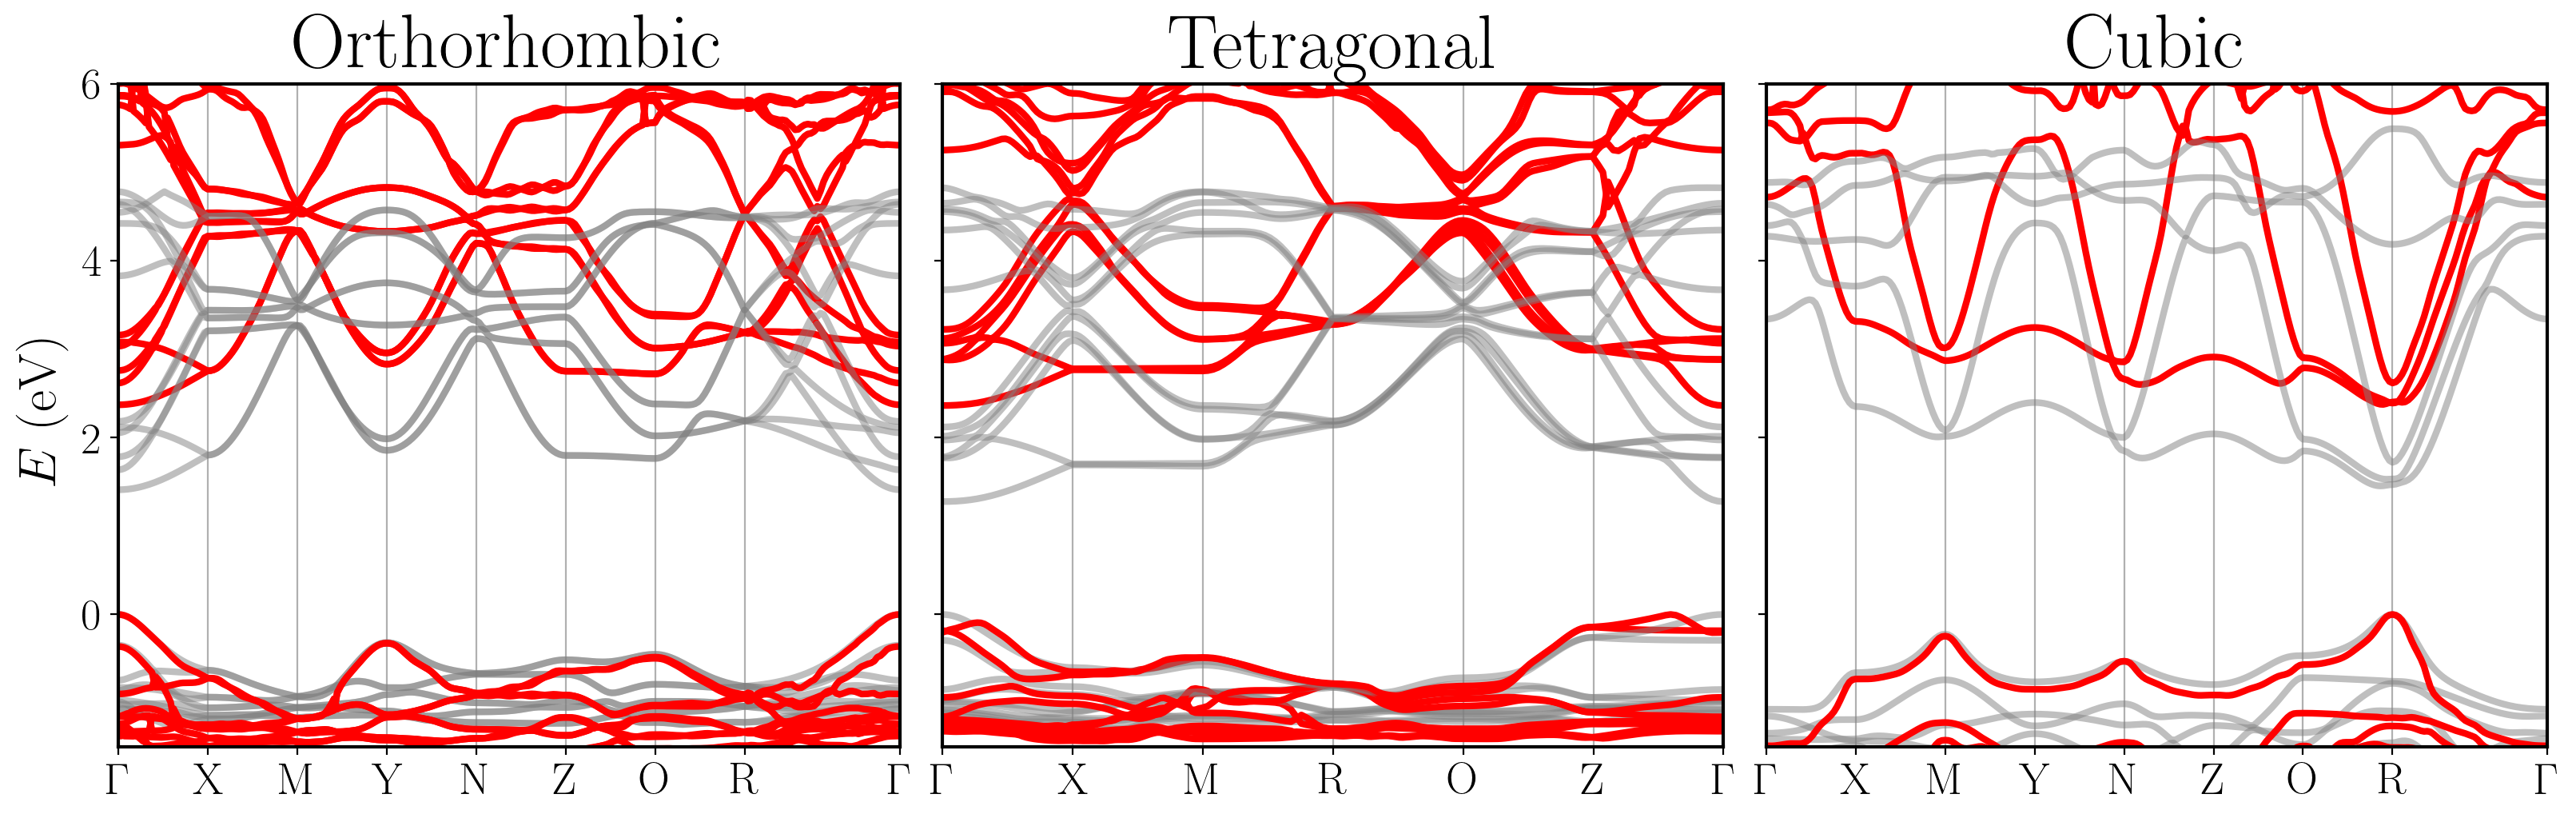

In [77]:

print(np.shape(K_t), np.shape(bands_dft_t), np.shape(bands_dft_t[:, 0]))


f, axs = plt.subplots(ncols=3, sharey=True, sharex=False, figsize=(16,5))


plt.sca(axs[0])
plt.xticks(K_path_from_k_pts_list(Path_ortho), Names_ortho)
plt.xlim([0, K_path_from_k_pts_list(Path_ortho)[-1]])
plt.title('Orthorhombic')
plt.grid(axis='x')

for iband in range(np.shape(bands_dft_o)[0]):
    plt.plot(K_o, bands_dft_o[iband, :], color='gray', alpha = 0.5)
    plt.plot(K_o, bands_qp_o[iband, :], color='red', alpha = 1.0)
    
plt.sca(axs[1])
plt.xticks(K_path_from_k_pts_list(Path_tetra), Names_tetra)
plt.xlim([0, K_path_from_k_pts_list(Path_tetra)[-1]])
plt.title('Tetragonal')
plt.grid(axis='x')

for iband in range(np.shape(bands_dft_t)[0]):
    plt.plot(K_t, bands_dft_t[iband, :], color='gray', alpha = 0.5)
    plt.plot(K_t, bands_qp_t[iband, :], color='red', alpha = 1.0)
    
plt.sca(axs[2])
plt.xticks(K_path_from_k_pts_list(Path_cubic), Names_cubic)
plt.xlim([0, K_path_from_k_pts_list(Path_cubic)[-1]])
plt.title('Cubic')
plt.grid(axis='x')

for iband in range(np.shape(bands_dft_c)[0]):
    plt.plot(K_c, bands_dft_c[iband, :], color='gray', alpha = 0.5)
    plt.plot(K_c, bands_qp_c[iband, :], color='red', alpha = 1.0)
    
plt.ylim([-1.5, 6])
f.supylabel(r'$E \ (\mathrm{eV})$')





# Scissor operators

# Absorption

In [56]:
data_abs_ortho = np.loadtxt('/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Absorption/absorption_eh.dat')
data_abs_tetra = np.loadtxt('/Users/rdelgrande/work/TEMP_DATA/MAPI_tetragonal/gw_bse/10.1-absorption_mom/absorption_eh.dat')
data_abs_cubic = np.loadtxt('/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/Absorption_new/absorption_eh.dat')

(1.0, 4.5)

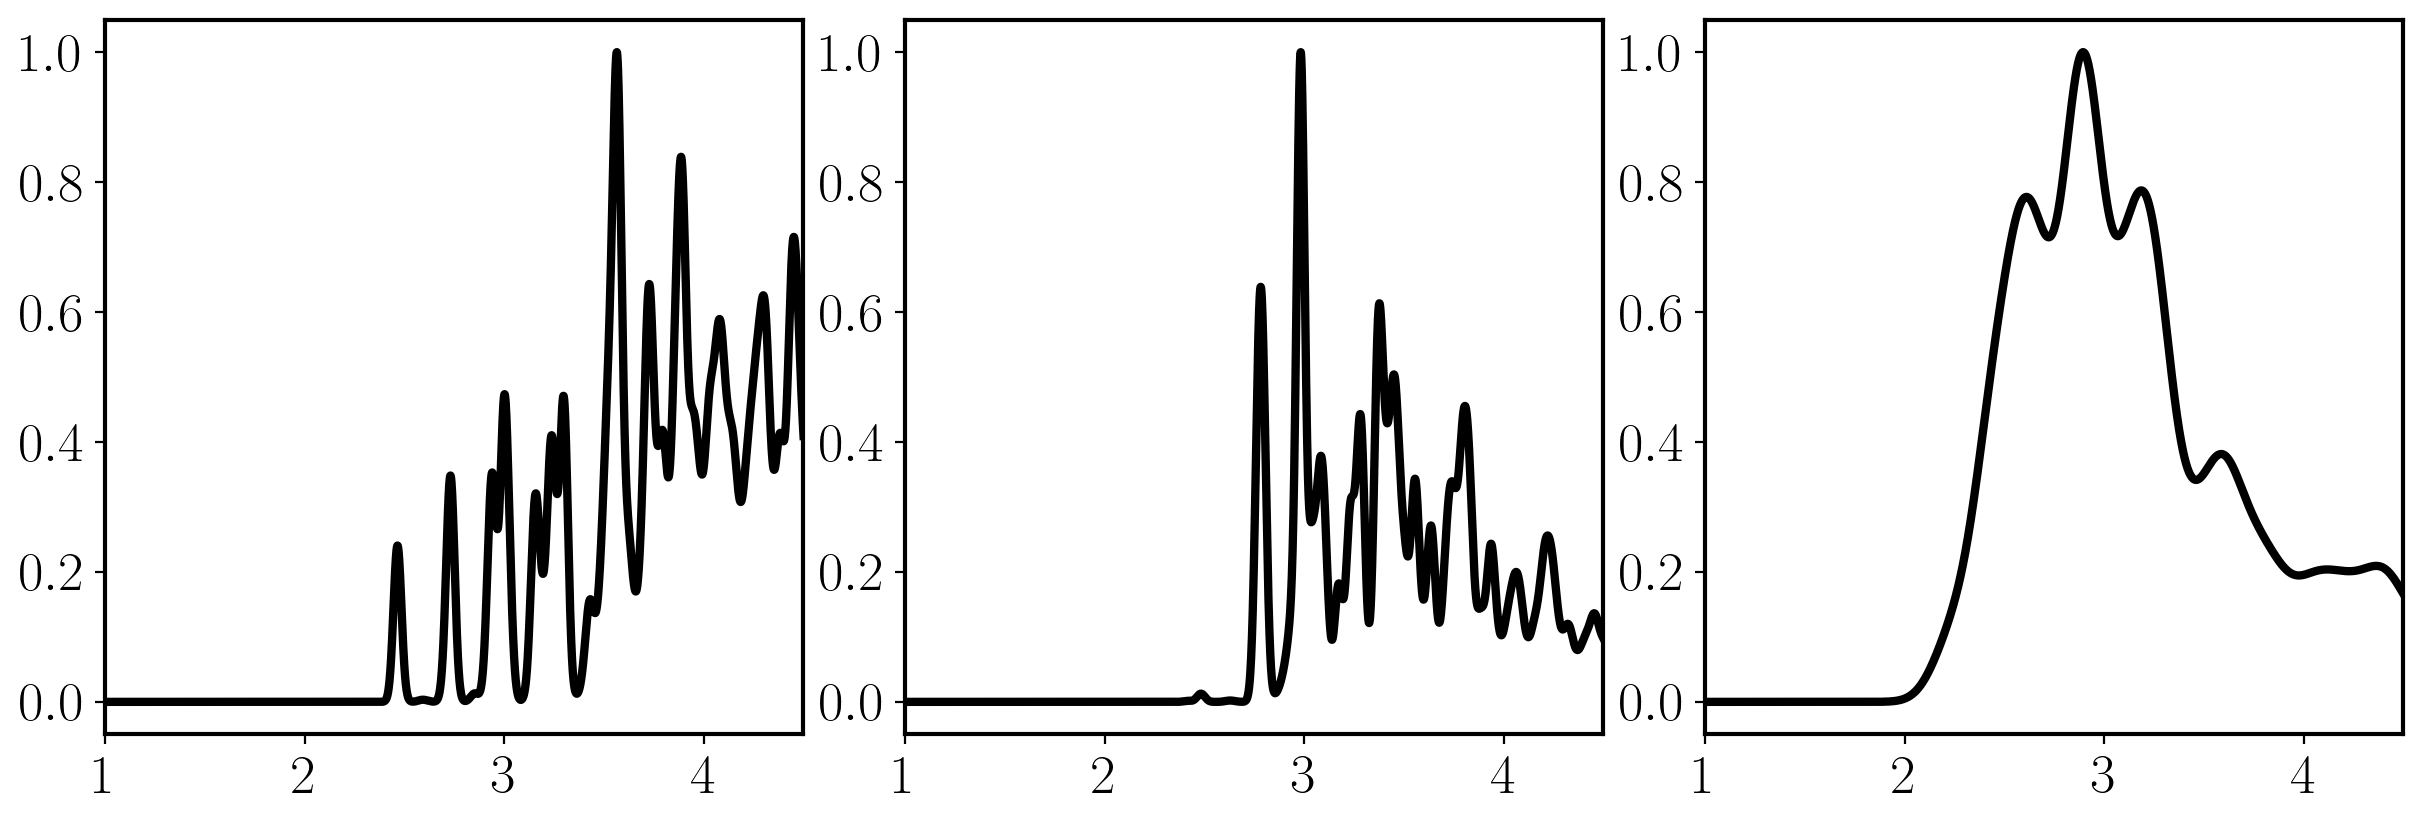

In [57]:
f, axs = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=False)

plt.sca(axs[0])
plt.plot(data_abs_ortho[:, 0], data_abs_ortho[:, 1]/np.max(data_abs_ortho[:, 1]))

plt.sca(axs[1])
plt.plot(data_abs_tetra[:, 0], data_abs_tetra[:, 1]/np.max(data_abs_tetra[:, 1]))

plt.sca(axs[2])
plt.plot(data_abs_cubic[:, 0], data_abs_cubic[:, 1]/np.max(data_abs_cubic[:, 1]))

plt.xlim([1, 4.5])



# Excited state forces

In [58]:
# getting vibrational freqs

def get_freqs(dynmat_out_file):

    freqs_ph = []

    arq = open(dynmat_out_file)
    for line in arq:
        line_split = line.split()
        if len(line_split) > 0:
            if line_split[0] == 'freq':
                freqs_ph.append(float(line_split[7]))
                # print(line_split, len(line_split))
                
    return np.array(freqs_ph)

eigvecs_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/DFPT/eigvecs'
freqs_ph_ortho = get_freqs(eigvecs_file)

eigvecs_file = '/Users/rdelgrande/work/TEMP_DATA/MAPI_tetragonal/gw_bse/5-wfn_fi/eigvecs'
freqs_ph_tetra = get_freqs(eigvecs_file)

eigvecs_file = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/5-wfn_fi_6kpts/eigvecs'
freqs_ph_cubic = get_freqs(eigvecs_file)

In [59]:

def get_forces_ph_basis(files_dir, iexc_max):
    
    forces_ph_basis = []
    
    for iexc in range(iexc_max):
        data_file = files_dir+f'/forces_phonons_basis.out_{iexc+1}'
        data = np.loadtxt(data_file, usecols=2)
        forces_ph_basis.append(data)
        
    return np.array(forces_ph_basis)

def get_forces_ph_basis2(files_dir, iexc_max):
    
    forces_ph_basis = []
    
    for iexc in range(iexc_max):
        data_file = files_dir+f'/forces_phonons_basis.out_{iexc+1}-{iexc+1}'
        data = np.loadtxt(data_file, usecols=2)
        forces_ph_basis.append(data)
        
    return np.array(forces_ph_basis)


In [60]:
iexc_max = 22

files_dir = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/excited_state_forces/'
forces_ph_basis_ortho = 4*get_forces_ph_basis(files_dir, iexc_max)

files_dir = '/Users/rdelgrande/work/TEMP_DATA/MAPI_tetragonal/excited_state_forces/'
forces_ph_basis_tetra = 4*get_forces_ph_basis(files_dir, iexc_max)

files_dir = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/Absorption_new/excited_state_forces/'
forces_ph_basis_cubic = get_forces_ph_basis2(files_dir, iexc_max)

In [61]:
print(np.shape(forces_ph_basis_cubic))
print(np.shape(forces_ph_basis_cubic)[1])

(22, 36)
36


In [62]:
# load exciton energies for x label of this figure

file_eigvals = '/Users/rdelgrande/work/TEMP_DATA/MAPI_orthorhombic/frontera/Absorption/eigenvalues.dat'
exciton_energies_ortho = np.loadtxt(file_eigvals)[:, 0]

file_eigvals = '/Users/rdelgrande/work/TEMP_DATA/MAPI_tetragonal/gw_bse/10.1-absorption_mom/eigenvalues.dat'
exciton_energies_tetra = np.loadtxt(file_eigvals)[:, 0]

file_eigvals = '/Users/rdelgrande/work/TEMP_DATA/gw_bse_cubic_MAPI/BGW_new_pinnacles/Absorption_new/eigenvalues.dat'
exciton_energies_cubic = np.loadtxt(file_eigvals)[:, 0]

In [63]:
# filtering more relevant forces to be shown

Fmax = max(np.max(forces_ph_basis_cubic), np.max(forces_ph_basis_tetra), np.max(forces_ph_basis_ortho))
print(f'Fmax = {Fmax}')
Fmin = Fmax / 8

def filter_forces(Fmin, forces_ph):
    relevant_forces_indexes = []
    for i_ph in range(np.shape(forces_ph)[1]):
        fmax_for_i_ph = np.max(forces_ph[:, i_ph])
        if fmax_for_i_ph >= Fmin:
            relevant_forces_indexes.append(i_ph)
    return relevant_forces_indexes


indexes_forces_ortho = filter_forces(Fmin, forces_ph_basis_ortho)
indexes_forces_tetra = filter_forces(Fmin, forces_ph_basis_tetra)
indexes_forces_cubic = filter_forces(Fmin, forces_ph_basis_cubic)
    
print(f'Ortho {len(indexes_forces_ortho)}')
print(f'Tetra {len(indexes_forces_tetra)}')
print(f'Cubic {len(indexes_forces_cubic)}')


Fmax = 0.9345623341515731
Ortho 10
Tetra 18
Cubic 6


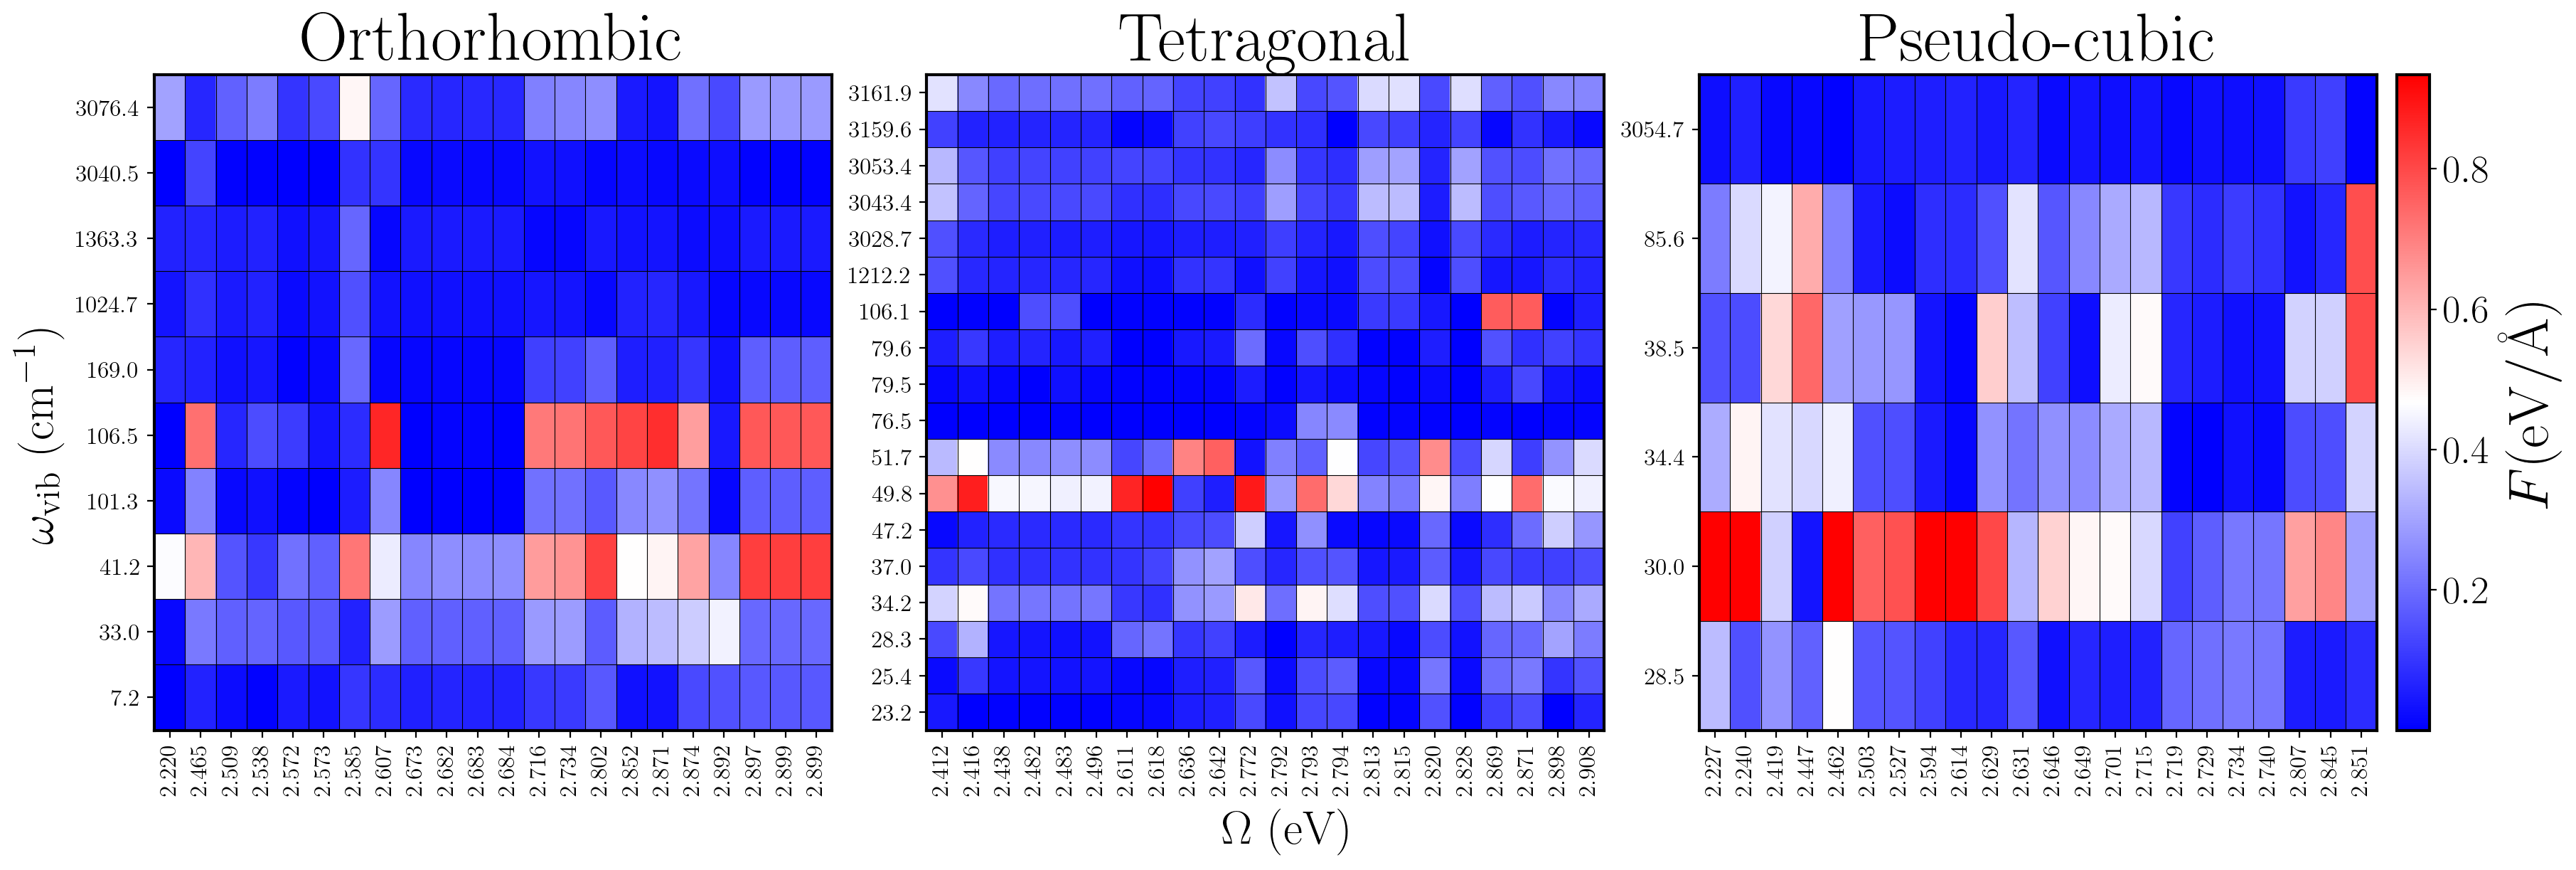

In [64]:

XTICKS_VALS = [iexc for iexc in range(iexc_max)]

def plot_force_matrix(forces_ph_basis, indexes_forces, freqs, exciton_energies):
    matrix_forces = abs(np.transpose(forces_ph_basis[:, indexes_forces]))
    im = plt.imshow(matrix_forces, origin="lower", aspect='auto', cmap='bwr', vmax=Fmax)
    
    # cb = plt.colorbar(im, aspect=10, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')

    XTICKS = ["%.3f" % exciton_energies[i_omega] for i_omega in range(len(XTICKS_VALS))]
    plt.xticks(XTICKS_VALS, XTICKS, rotation=90, fontsize=12)
    YTICKS = ["%.1f" % freqs[imode] for imode in indexes_forces]
    plt.yticks([imode for imode in range(len(YTICKS))], YTICKS, fontsize=12)
    
    # plotting grid lines to look cool
    Nx, Ny = np.shape(forces_ph_basis[:, indexes_forces])
    for i_exc in range(Nx):
        plt.axvline(x = i_exc + 0.5, color='black', linewidth=0.4)
    
    for i_freq in range(Ny):
        plt.axhline(y = i_freq + 0.5, color='black', linewidth=0.4)


f, axs = plt.subplots(ncols=3, figsize=(18, 6), sharex=False, sharey=False)

plt.sca(axs[0])
plt.title("Orthorhombic")
plot_force_matrix(forces_ph_basis_ortho, indexes_forces_ortho, freqs_ph_ortho, exciton_energies_ortho)

plt.sca(axs[1])
plt.title("Tetragonal")
plot_force_matrix(forces_ph_basis_tetra, indexes_forces_tetra, freqs_ph_tetra, exciton_energies_tetra)

plt.sca(axs[2])
plt.title("Pseudo-cubic")
plot_force_matrix(forces_ph_basis_cubic, indexes_forces_cubic, freqs_ph_cubic, exciton_energies_cubic)

plt.colorbar(aspect=20, pad=0.03, label=r'$F(\mathrm{eV/\AA})$')

f.supylabel(r"$\omega_{\mathrm{vib}} \ (\mathrm{cm^{-1}})$")
f.supxlabel(r"$\Omega \ (\mathrm{eV})$")

plt.savefig("Excited_state_forces_phases_MAPI.png", dpi=400)